**Homework / Tute Work**

1) Have a look at the [course notes](https://github.com/phys3112/intro/blob/master/mcba2-numerical-integration-of-ODEs.ipynb) or the [ODEint notes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to get a better idea of how the ODE function works.

2) Find another set of differential equations and run them through ODE int. This is good practice for the assignment. One starting point is [wikipedia](https://en.wikipedia.org/wiki/List_of_named_differential_equations)

Here are a few examples in increasing difficulty:
* [Radioactive decay](https://en.wikipedia.org/wiki/Radioactive_decay#Mathematics)
* [Predator–prey equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)
* [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system)

In [1]:
import scipy.integrate
import numpy as np
from matplotlib import pyplot as plt

Radioactive decay

$$ \frac{dN}{dt} = - \lambda N$$

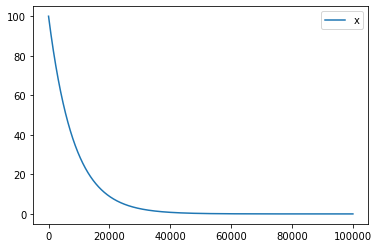

In [2]:
# setting up our timebase array
steps = 100000
timestep = 1 # the units depend on the problem
timebase = np.arange(0,steps*timestep,timestep)

# defining the function
def decay(N, t, halflife):
    l = np.log(2)/halflife
    return -l*N

# Setting the inital value for y
N = 100 # grams
halflife = 5730 # Carbon-14 halflife 5730 years 
# Doing the integral
y = scipy.integrate.odeint(decay, N, timebase, args=(halflife,) ) # note that args wil only takes a tuple

# Plotting it
plt.plot(timebase, y, label="x")
plt.legend()

Predetor-prey equation (Lotka–Volterra)

$$ \frac{dx}{dt} = ax - bxy $$

$$ \frac{dy}{dt} = cxy - dy $$

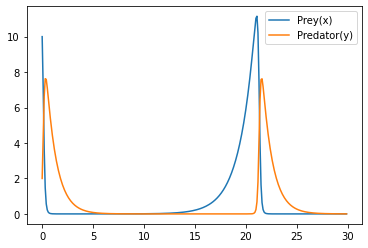

In [3]:
# setting up our timebase array
steps = 300
timestep = 0.1 # the units depend on the problem
timebase = np.arange(0,steps*timestep,timestep)

# defining the function
def predatorPrey(vec, t, a,b,c,d):
    x,y = vec # split the tuple y into its two values
    
    dxdt = a*x - b*x*y
    dydt = c*x*y - d*y
    
    return dxdt, dydt # return a tuple of our derivatives

# Setting the inital value for y
y0 = 10,2

# Doing the integral
y = scipy.integrate.odeint(predatorPrey, y0, timebase, args=(2/3,4/3,1,1) ) # note that args wil only takes a tuple

# Plotting it
plt.plot(timebase, y[:,0], label="Prey(x)")
plt.plot(timebase, y[:,1], label="Predator(y)")
plt.legend()

Text(0, 0.5, 'Predator')

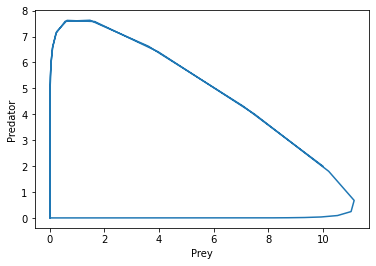

In [4]:
plt.plot(y[:,0], y[:,1])
plt.xlabel("Prey")
plt.ylabel("Predator")

Lorenz System

$$ \frac{dx}{dt} = \sigma(y - x)$$

$$ \frac{dy}{dt} = x(\rho - z) - y $$

$$ \frac{dz}{dt} = xy -\beta z$$

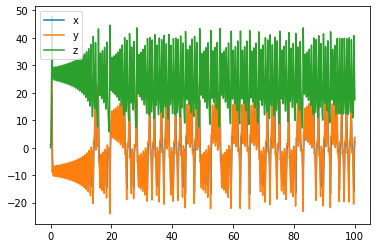

In [5]:
# setting up our timebase array
steps = 10000
timestep = 0.01 # the units depend on the problem
timebase = np.arange(0,steps*timestep,timestep)

# defining the function
def lorentz(vec, t, rho,sigma,beta):
    x,y,z = vec # split the tuple y into its two values
    
    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    
    return dxdt, dydt, dzdt # return a tuple of our derivatives

# Setting the inital value for y
y0 = 0,1,1.05

# Doing the integral
y = scipy.integrate.odeint(lorentz, y0, timebase, args=(28,10,8/3) ) # note that args wil only takes a tuple

# Plotting it
plt.plot(timebase, y[:,0], label="x")
plt.plot(timebase, y[:,1], label="y")
plt.plot(timebase, y[:,2], label="z")
plt.legend()

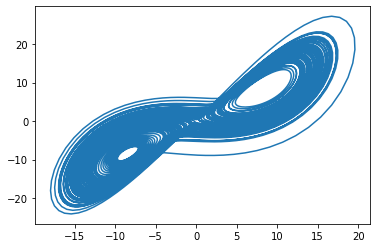

In [6]:
plt.plot(y[:,0], y[:,1], label="x")

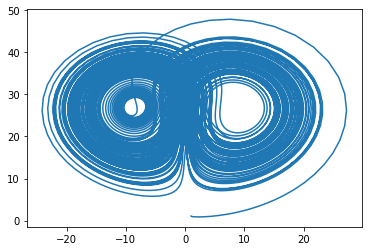

In [7]:
plt.plot(y[:,1], y[:,2], label="x")

Text(0.5, 0.92, 'Lorenz Attractor')

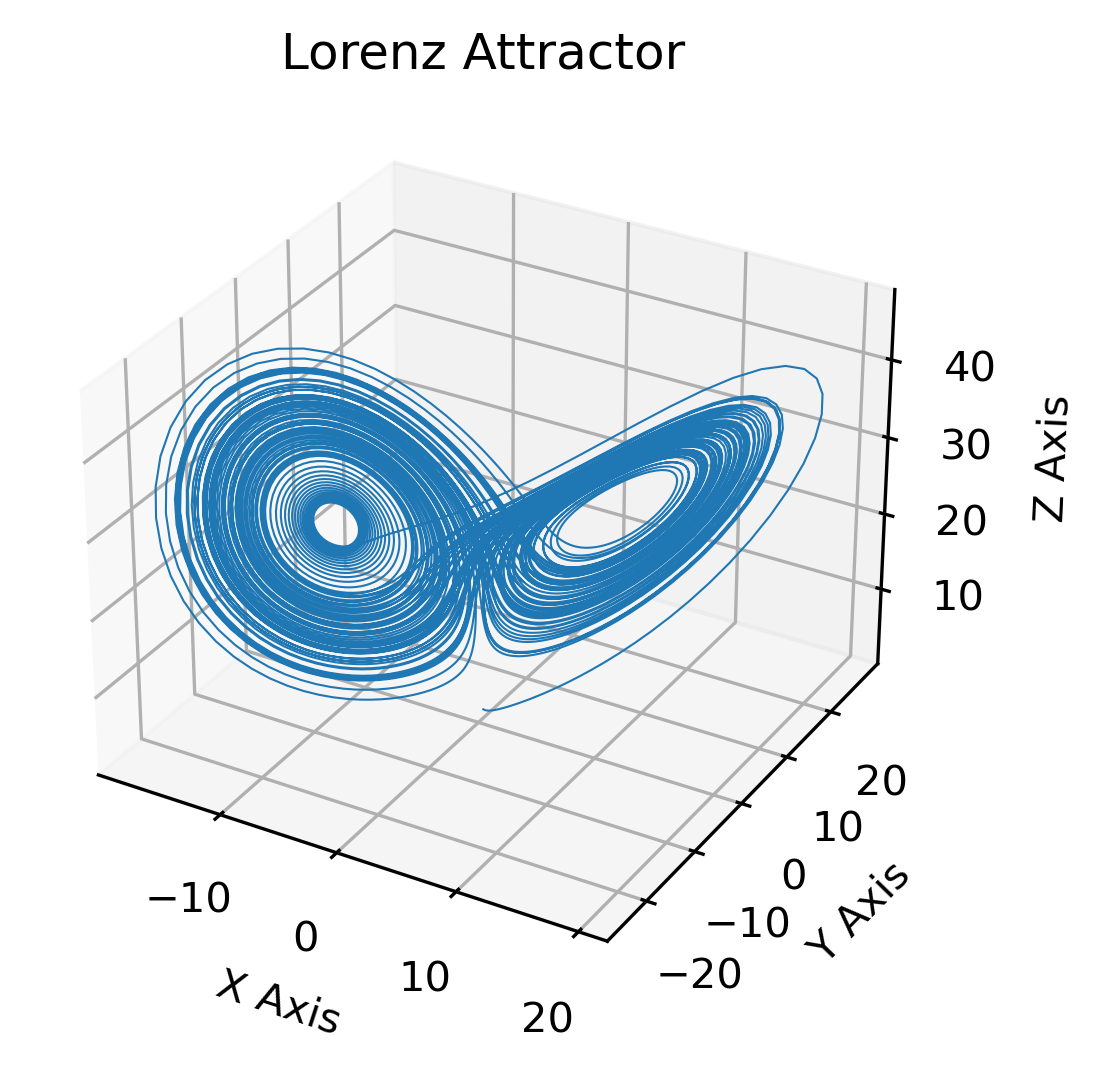

In [13]:
ax = plt.figure(dpi=300).add_subplot(projection='3d')

ax.plot(y[:,0], y[:,1], y[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")